# 決定木のデモプログラム

決定木のデモプログラムです。  
決定木の中身に関してはこちら↓で解説しています。  
https://yuyumoyuyu.com/2021/02/07/decisiontree/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_moons
from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from dtreeviz.trees import dtreeviz

from sklearn.linear_model import LinearRegression

%matplotlib inline

# 分類木

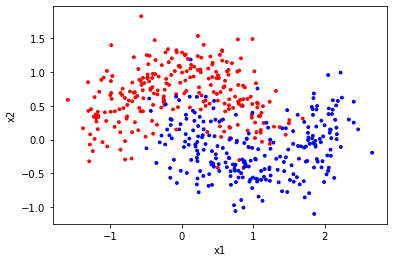

In [2]:
# sklearnのデータセットを用いる

X, y = make_moons(n_samples=500, noise=0.3, random_state=6)

plt.figure()

cmap = ListedColormap(('red', 'blue'))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap=cmap, s=8)

plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

In [3]:
# 入力データは2次元の座標データ
print("X =\n", X[:10])

X =
 [[ 1.05769609e-01  1.42222019e-02]
 [-6.69715288e-01  6.91297509e-01]
 [-1.20374501e+00  3.70471637e-01]
 [ 2.40648591e+00  5.59849147e-01]
 [ 1.07922887e+00  3.46245244e-01]
 [ 1.95305802e+00  2.78931158e-01]
 [ 1.15826758e+00 -4.38060183e-01]
 [ 6.66709932e-01 -2.39615329e-03]
 [-6.55169079e-01  2.55762239e-01]
 [ 1.42811074e+00 -3.32526975e-01]]


In [4]:
#　学習データをtrain/test分割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

In [5]:
# max_depth = None
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

# trainデータに過学習する

Accuracy on training set: 1.000
Accuracy on test set: 0.856


In [6]:
# max_depth = 3
tree2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree2.fit(X_train, y_train)

print("==max_depth: 3==")
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

# 過学習が抑えられる

==max_depth: 3==
Accuracy on training set: 0.896
Accuracy on test set: 0.880


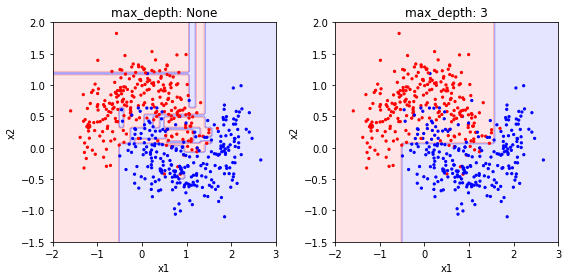

In [7]:
# 学習結果を可視化
x1 = np.linspace(-2.0, 3.0, 100)
x2 = np.linspace(-1.5, 2.0, 100)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)    

z1 = tree1.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
z1 = z1.reshape(x1_mesh.shape)
z2 = tree2.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
z2 = z2.reshape(x1_mesh.shape)

z_list = [z1, z2]
titles = ['max_depth: None', 'max_depth: 3']

fig, axes = plt.subplots(1, 2, figsize=(8,4))

for ax, z, title in zip(axes, z_list, titles):
    ax.contourf(x1_mesh, x2_mesh, z, cmap=cmap, alpha=0.1, linestyles=None)
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap=cmap, s=5)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    ax.set_title(title)

fig.tight_layout()

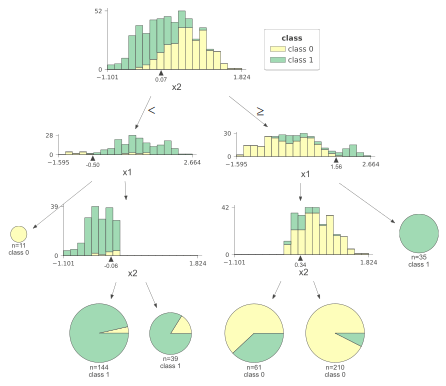

In [8]:
# 木構造を可視化(max_depth:3)
viz = dtreeviz(
    tree2,
    X,
    y,
    target_name='class',
    feature_names=['x1','x2']
)

display(viz) # jupyter-notebook内で出力
#viz.view() # SVGで出力

# 回帰木

回帰木で外挿はできないよ，というお話

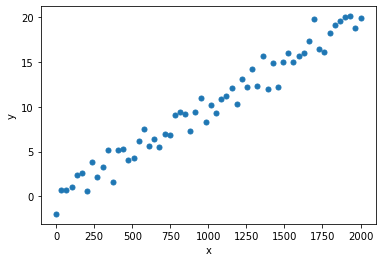

In [9]:
# データセットを作成
x_reg = np.linspace(0,2000,60)
y_reg = x_reg/100 + np.random.randn(60)

# 可視化
plt.plot(x_reg, y_reg, 'o', ms=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
# データのtrain/test分割
x_reg_train = x_reg[:30].reshape(-1,1) # x<1000が訓練データ
y_reg_train = y_reg[:30]
x_reg_test = x_reg[30:].reshape(-1,1) # x>=1000がテストデータ
# y_reg_test = y_reg[1000:]

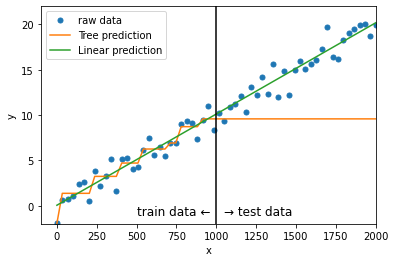

In [11]:
# 回帰木
tree_reg = DecisionTreeRegressor(max_depth=3,random_state=0)
tree_reg.fit(x_reg_train, y_reg_train)

# 線形回帰（比較）
linear_reg = LinearRegression().fit(x_reg_train, y_reg_train)

# 予測結果比較
y_pred_tree = np.hstack((tree_reg.predict(x_reg_train),tree_reg.predict(x_reg_test)))
y_pred_linear = np.hstack((linear_reg.predict(x_reg_train),linear_reg.predict(x_reg_test)))

plt.plot(x_reg, y_reg, 'o', ms=5, label='raw data')
plt.plot(x_reg, y_pred_tree, label='Tree prediction')
plt.plot(x_reg, y_pred_linear, label='Linear prediction')
plt.plot([1000, 1000], [-5, 25], '-', c='k')

plt.text(1050, -1, '→ test data', fontsize=12)
plt.text(500, -1, 'train data ←', fontsize=12)

plt.xlabel('x')
plt.ylabel('y')

plt.xlim([-100,2000])
plt.ylim([-2,22])

plt.legend()

plt.show()

回帰木は外挿ができない